<a href="https://colab.research.google.com/github/AhmetA75/WEEK10-MNIST/blob/main/WEEK10_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [230]:
from keras.utils.data_utils import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [175]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [176]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

optimizer=RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

batch_size=32
epochs=10
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 activation_6 (Activation)   (None, 11, 11, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 64)          73792     
                                                      

In [177]:
batch_sizes = list()

In [178]:
scores = list()

In [179]:
times = list()

In [181]:
batch_size_1 = 32 
epochs = 4
batch_sizes.append(batch_size_1)
start = time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_1 = model.evaluate(x_test,y_test)
scores.append(score_1)
stop_1 = {time()-start}
times.append(stop_1)
print(f'time for batch_size 32==> {time() - start}')
print("test loss: ",score_1[0])
print("test acc: ",score_1[1])



Epoch 1/4
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1459 - accuracy: 0.9569 - val_loss: 0.0584 - val_accuracy: 0.9838
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0616 - accuracy: 0.9844 - val_loss: 0.0440 - val_accuracy: 0.9893
Epoch 3/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0575 - accuracy: 0.9862 - val_loss: 0.0358 - val_accuracy: 0.9900
Epoch 4/4
313/313 [==============================] - 1s 4ms/step - loss: 0.0426 - accuracy: 0.9883
time for batch_size 32==> 84.1941864490509
test loss:  0.04259318485856056
test acc:  0.9883000254631042


In [182]:

batch_size_2 = 64 
batch_sizes.append(batch_size_2)
epochs = 4


history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_2 = model.evaluate(x_test,y_test)
scores.append(score_2)
stop_2 = {time()-start}
times.append(stop_2)
print("test loss: ",score_2[0])
print("test acc: ",score_2[1])

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0619 - accuracy: 0.9869 - val_loss: 0.0707 - val_accuracy: 0.9886
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0676 - accuracy: 0.9865 - val_loss: 0.1184 - val_accuracy: 0.9853
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0705 - accuracy: 0.9863 - val_loss: 0.1257 - val_accuracy: 0.9799
Epoch 4/4
313/313 [==============================] - 1s 4ms/step - loss: 0.0878 - accuracy: 0.9836
test loss:  0.08784223347902298
test acc:  0.9836000204086304


In [186]:

batch_size_3 = 128 
epochs = 4
batch_sizes.append(batch_size_3)
start = time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_3 = model.evaluate(x_test,y_test)
scores.append(score_3)
stop_3 = {time()-start}
times.append(stop_3)
print("test loss: ",score_3[0])
print("test acc: ",score_3[1])

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0764 - accuracy: 0.9854 - val_loss: 0.0580 - val_accuracy: 0.9848
Epoch 2/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0922 - accuracy: 0.9844 - val_loss: 0.0620 - val_accuracy: 0.9832
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0812 - accuracy: 0.9841 - val_loss: 0.4335 - val_accuracy: 0.9677
Epoch 4/4
313/313 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9834
test loss:  0.06652335077524185
test acc:  0.9833999872207642


In [187]:
batch_size_4 = 256 
batch_sizes.append(batch_size_4)
epochs = 4

start = time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_4 = model.evaluate(x_test,y_test)
scores.append(score_4)
stop_4 = {time()-start}
times.append(stop_4)
print("test loss: ",score_4[0])
print("test acc: ",score_4[1])

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0938 - accuracy: 0.9827 - val_loss: 0.3426 - val_accuracy: 0.8953
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1022 - accuracy: 0.9820 - val_loss: 0.1021 - val_accuracy: 0.9847
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1061 - accuracy: 0.9824 - val_loss: 0.1577 - val_accuracy: 0.9840
Epoch 4/4
313/313 [==============================] - 1s 4ms/step - loss: 0.1347 - accuracy: 0.9823
test loss:  0.13474783301353455
test acc:  0.9822999835014343


In [188]:
batch_size_5 = 512
epochs = 4
batch_sizes.append(batch_size_5)

start= time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_5= model.evaluate(x_test,y_test)
scores.append(score_5)
stop_5 = {time()-start}
times.append(stop_5)
print("test loss: ",score_5[0])
print("test acc: ",score_5[1])

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1314 - accuracy: 0.9793 - val_loss: 0.0871 - val_accuracy: 0.9836
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1328 - accuracy: 0.9785 - val_loss: 0.1054 - val_accuracy: 0.9826
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1406 - accuracy: 0.9766 - val_loss: 0.0981 - val_accuracy: 0.9793
Epoch 4/4
313/313 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9838
test loss:  0.08879125118255615
test acc:  0.9837999939918518


In [189]:
batch_size_6 = 1024
batch_sizes.append(batch_size_6)

epochs = 4

start= time()
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

score_6= model.evaluate(x_test,y_test)
scores.append(score_6)

stop_6 = {time()-start}
times.append(stop_6)

print("test loss: ",score_6[0])
print("test acc: ",score_6[1])

Epoch 1/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1509 - accuracy: 0.9779 - val_loss: 0.0974 - val_accuracy: 0.9740
Epoch 2/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1517 - accuracy: 0.9766 - val_loss: 0.0789 - val_accuracy: 0.9826
Epoch 3/4
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1507 - accuracy: 0.9777 - val_loss: 0.2365 - val_accuracy: 0.9832
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9746
test loss:  0.107246033847332
test acc:  0.9746000170707703


In [211]:
times

[{84.1941270828247},
 {199.70007967948914},
 {83.28904294967651},
 {83.30148410797119},
 {83.27470564842224},
 {48.168163537979126}]

In [231]:
print(type(times[0]))

<class 'set'>


In [218]:
times

[{84.1941270828247},
 {199.70007967948914},
 {83.28904294967651},
 {83.30148410797119},
 {83.27470564842224},
 {48.168163537979126}]

In [ ]:
times_list = sorted(times)

In [ ]:
print(type(times_list[0]))

<class 'set'>


In [191]:
batch_sizes

[32, 64, 128, 256, 512, 1024]

In [192]:
scores

[[0.04259318485856056, 0.9883000254631042],
 [0.08784223347902298, 0.9836000204086304],
 [0.06652335077524185, 0.9833999872207642],
 [0.13474783301353455, 0.9822999835014343],
 [0.08879125118255615, 0.9837999939918518],
 [0.107246033847332, 0.9746000170707703]]

In [193]:
print(type(scores[0]))

<class 'list'>


In [194]:
ss = pd.DataFrame(scores)
ss

,0,1
0,0.042593,0.9883
1,0.087842,0.9836
2,0.066523,0.9834
3,0.134748,0.9823
4,0.088791,0.9838
5,0.107246,0.9746


In [195]:
ss.drop(ss.columns[0], axis = 1, inplace=True)

In [220]:
type(times)

list

In [226]:
times_1 = (84.19,199.7,83.28,83.3,83.27,48.16)

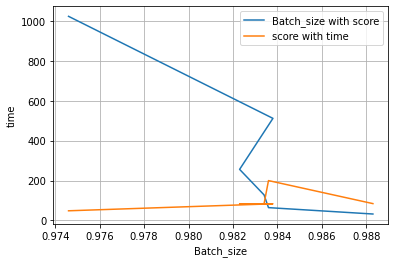

In [229]:
line1 = plt.plot(ss,batch_sizes,label="Batch_size with score")
line2 = plt.plot(ss,times_1,label="score with time")
plt.xlabel("Batch_size")
plt.ylabel("time")
plt.grid(True)
plt.legend()
plt.show()